# Data Cleaning


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder , StandardScaler , MinMaxScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\Assignment\\Data\\sales_and_customer_insights.csv")

In [3]:
data.head()

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount


In [4]:
data.shape

(10000, 15)

In [5]:
data.isnull().sum()

Customer_ID                 0
Product_ID                  0
Transaction_ID              0
Purchase_Frequency          0
Average_Order_Value         0
Most_Frequent_Category      0
Time_Between_Purchases      0
Region                      0
Churn_Probability           0
Lifetime_Value              0
Launch_Date                 0
Peak_Sales_Date             0
Season                      0
Preferred_Purchase_Times    0
Retention_Strategy          0
dtype: int64

In [6]:
data.describe()

,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.955700,110.006022,46.885300,0.501552,5031.930567
std,5.526209,52.096870,24.711746,0.288289,2865.420299
min,1.000000,20.010000,5.000000,0.000000,100.160000
25%,5.000000,65.262500,25.000000,0.250000,2518.775000
50%,10.000000,109.930000,47.000000,0.500000,5012.180000
75%,15.000000,155.480000,68.000000,0.750000,7526.232500
max,19.000000,199.960000,89.000000,1.000000,9999.760000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10000 non-null  object 
 1   Product_ID                10000 non-null  object 
 2   Transaction_ID            10000 non-null  object 
 3   Purchase_Frequency        10000 non-null  int64  
 4   Average_Order_Value       10000 non-null  float64
 5   Most_Frequent_Category    10000 non-null  object 
 6   Time_Between_Purchases    10000 non-null  int64  
 7   Region                    10000 non-null  object 
 8   Churn_Probability         10000 non-null  float64
 9   Lifetime_Value            10000 non-null  float64
 10  Launch_Date               10000 non-null  object 
 11  Peak_Sales_Date           10000 non-null  object 
 12  Season                    10000 non-null  object 
 13  Preferred_Purchase_Times  10000 non-null  object 
 14  Retenti

In [8]:
data.sample(3)

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
7821,CUST_LQVCZ0,PROD_RSHX39,TRANS_EHKTX9,11,47.27,Electronics,65,Europe,0.14,7180.44,2020-08-20,2023-01-17,Spring,Afternoon,Discount
6428,CUST_LYPF3N,PROD_KDF8HF,TRANS_3BJKM5,5,31.40,Home,65,North America,0.87,7253.62,2022-10-05,2023-04-22,Summer,Evening,Loyalty Program
3739,CUST_CIXNM4,PROD_D8JUSU,TRANS_GVVSR0,9,31.90,Home,26,Europe,0.81,3555.91,2022-03-30,2023-07-30,Spring,Evening,Loyalty Program


In [9]:
data['Most_Frequent_Category'].unique()

array(['Electronics', 'Clothing', 'Sports', 'Home'], dtype=object)

In [10]:
data['Region'].unique()

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

In [11]:
data['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [12]:
data['Preferred_Purchase_Times'].unique()

array(['Afternoon', 'Evening', 'Morning'], dtype=object)

In [13]:
data['Retention_Strategy'].unique()

array(['Loyalty Program', 'Discount', 'Email Campaign'], dtype=object)

In [14]:
data['Launch_Date'] = pd.to_datetime(data['Launch_Date'])

data['Peak_Sales_Date'] = pd.to_datetime(data['Peak_Sales_Date'])


In [15]:
#extract year from Launch_Date and Peak_Sales_Date
data['Launch_year']=data['Launch_Date'].dt.year
data['Peak_Sales_year']=data['Peak_Sales_Date'].dt.year
data.head()

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy,Launch_year,Peak_Sales_year
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program,2020,2023
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount,2022,2023
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program,2021,2023
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount,2022,2023
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount,2022,2023


In [16]:
#extract month from Launch_Date and Peak_Sales_Date
data['Launch_month']=data['Launch_Date'].dt.month
data['Peak_Sales_month']=data['Peak_Sales_Date'].dt.month

In [17]:
#extract days from Launch_Date and Peak_Sales_Date
data['Launch_day']=data['Launch_Date'].dt.day
data['Peak_Sales_day']=data['Peak_Sales_Date'].dt.day
data.head()

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,...,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy,Launch_year,Peak_Sales_year,Launch_month,Peak_Sales_month,Launch_day,Peak_Sales_day
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,...,2023-09-11,Winter,Afternoon,Loyalty Program,2020,2023,3,9,14,11
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,...,2023-01-02,Spring,Afternoon,Discount,2022,2023,10,1,15,2
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,...,2023-04-06,Winter,Evening,Loyalty Program,2021,2023,11,4,30,6
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,...,2023-03-23,Spring,Evening,Discount,2022,2023,3,3,20,23
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,...,2023-10-28,Spring,Morning,Discount,2022,2023,11,10,9,28


In [18]:
columns_to_drop = [
    'Product_ID' ,
    'Customer_ID',
    'Transaction_ID',
    'Launch_Date',
    'Peak_Sales_Date',
]



In [19]:
data_cleaned = data.drop(columns=columns_to_drop)


In [20]:
data_cleaned.sample()

,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Season,Preferred_Purchase_Times,Retention_Strategy,Launch_year,Peak_Sales_year,Launch_month,Peak_Sales_month,Launch_day,Peak_Sales_day
4784,3,47.33,Clothing,46,Europe,0.48,8780.44,Fall,Morning,Discount,2022,2023,12,6,14,8


<Axes: xlabel='Lifetime_Value'>

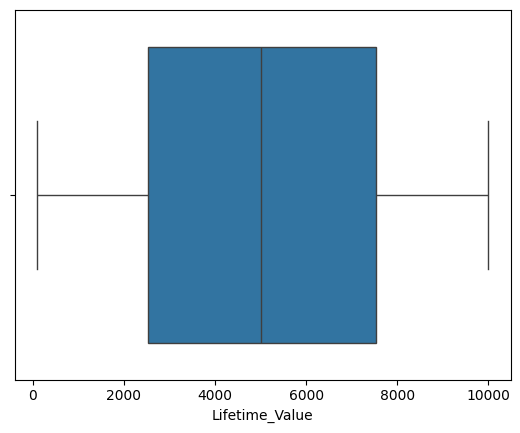

In [21]:
sns.boxplot(x=data['Lifetime_Value'])


<Axes: xlabel='Purchase_Frequency'>

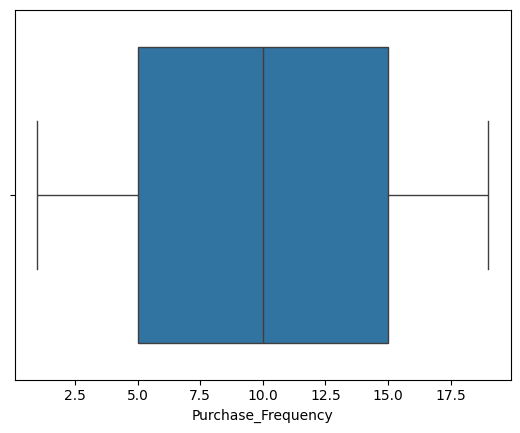

In [22]:
sns.boxplot(x=data['Purchase_Frequency'])


<Axes: xlabel='Average_Order_Value'>

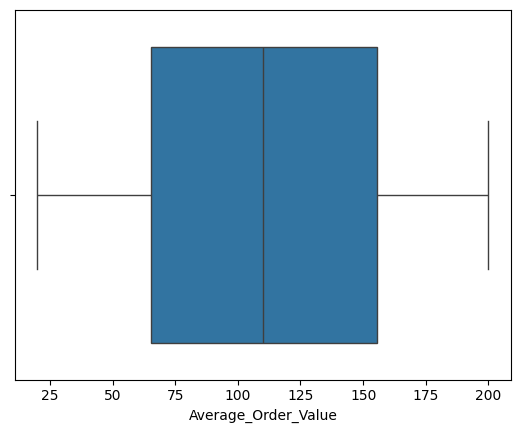

In [23]:
sns.boxplot(x=data['Average_Order_Value'])


<Axes: xlabel='Time_Between_Purchases'>

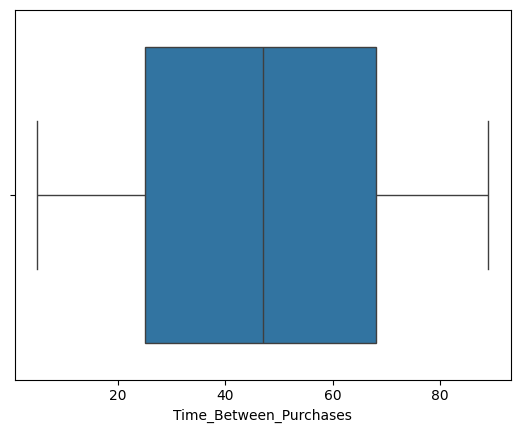

In [24]:
sns.boxplot(x=data['Time_Between_Purchases'])


<Axes: xlabel='Churn_Probability'>

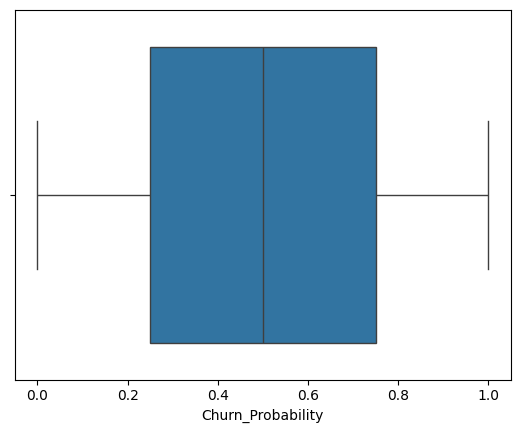

In [25]:
sns.boxplot(x=data['Churn_Probability'])


In [26]:
data_cleaned.sample(3)

,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Season,Preferred_Purchase_Times,Retention_Strategy,Launch_year,Peak_Sales_year,Launch_month,Peak_Sales_month,Launch_day,Peak_Sales_day
9247,6,119.83,Home,57,Europe,0.07,1346.67,Winter,Morning,Discount,2020,2023,2,2,19,24
5703,9,72.58,Sports,83,North America,0.84,4855.27,Summer,Morning,Discount,2021,2023,8,5,25,22
6868,14,158.68,Clothing,19,Europe,0.06,5587.99,Spring,Afternoon,Email Campaign,2020,2023,7,4,21,1


# EDA 

<Axes: xlabel='count', ylabel='Most_Frequent_Category'>

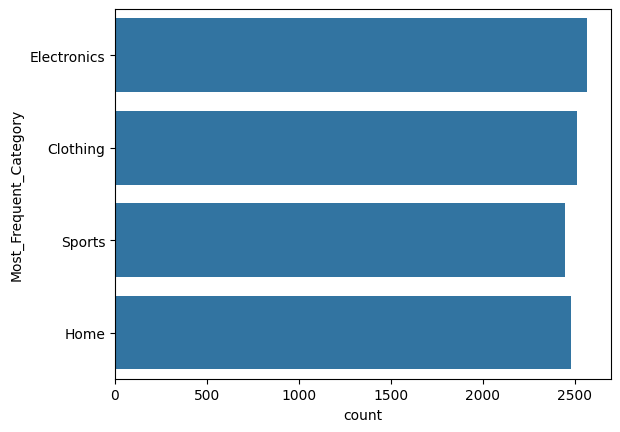

In [27]:
# Checking univarite on Most_Frequent_Category

sns.countplot(data_cleaned["Most_Frequent_Category"])


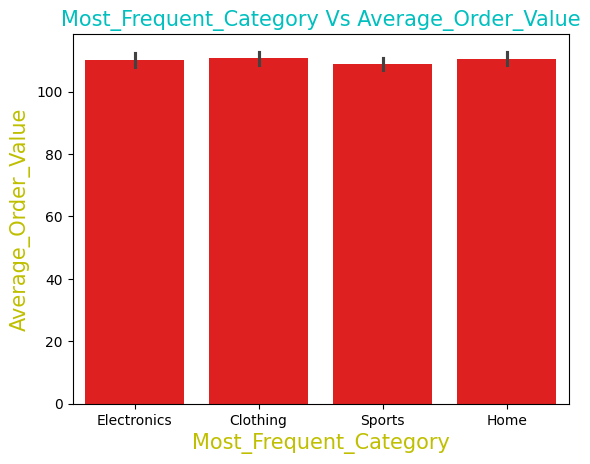

In [28]:
# Checking relationship between  Most_Frequent_Category and Average_Order_Value by using barplot

sns.barplot(x="Most_Frequent_Category", y="Average_Order_Value", data=data_cleaned, color="r")
plt.title("Most_Frequent_Category Vs Average_Order_Value", fontsize=15, color="c")
plt.xlabel("Most_Frequent_Category", fontsize=15, color="y")
plt.ylabel("Average_Order_Value", fontsize=15, color="y")
plt.show()

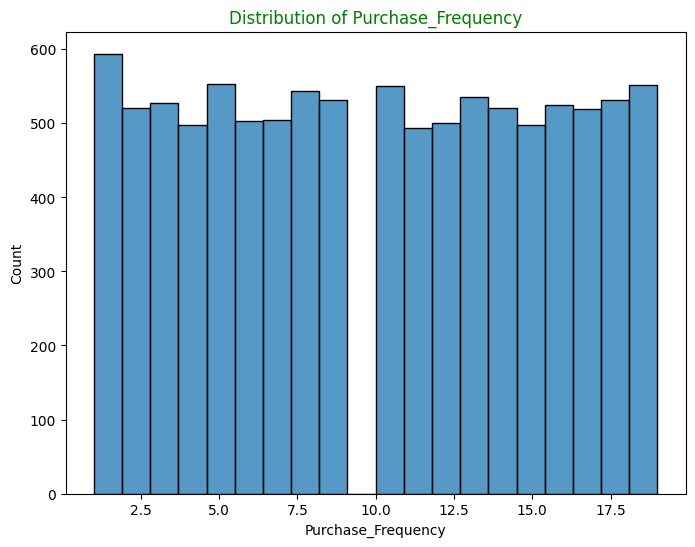

In [29]:
# Checking the distrubution of Purchase_Frequencys and how they vary

plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned["Purchase_Frequency"])
plt.title('Distribution of Purchase_Frequency', color = "g")
plt.xlabel("Purchase_Frequency", color = "k")
plt.show()


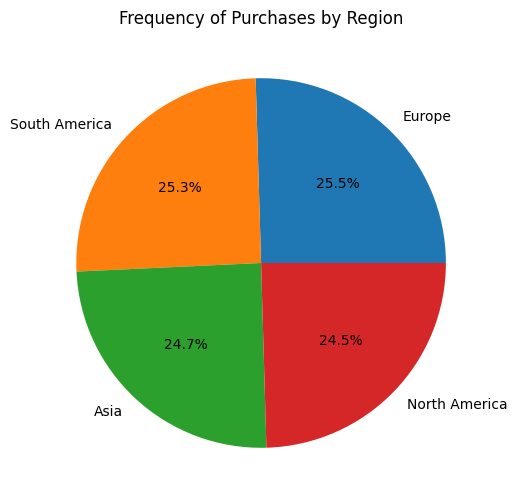

In [30]:
# Checking the Frequency of purchase by region which shows the region and there frequency of buying products

data_cleaned['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6))
plt.title('Frequency of Purchases by Region')
plt.ylabel('') 
plt.show()



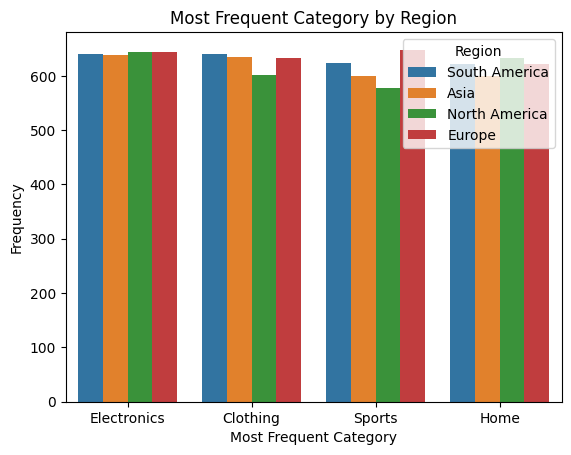

In [31]:
# The resulting plot will show the count of each category in Most_Frequent_Category, 
# and different colors (based on Region) will show the distribution of Region across 
# each Most_Frequent_Category

sns.countplot(x='Most_Frequent_Category', hue='Region', data=data_cleaned)
plt.title('Most Frequent Category by Region')
plt.xlabel('Most Frequent Category')
plt.ylabel('Frequency')
plt.show()



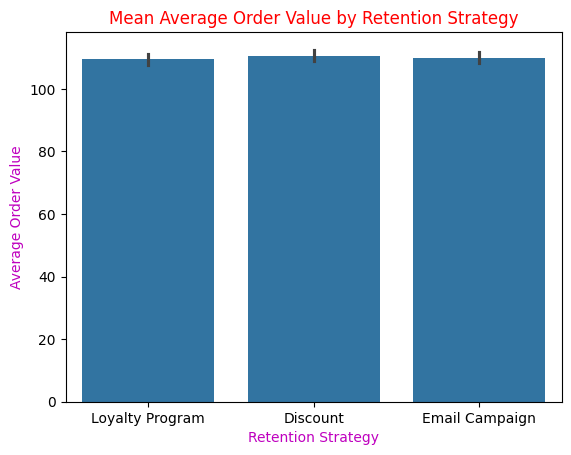

In [32]:
# Showing relationshio between Retention Strategy and Average Order Value and how each strategy play s a role 
# in sales 

sns.barplot(x='Retention_Strategy', y='Average_Order_Value', data=data_cleaned)
plt.title('Mean Average Order Value by Retention Strategy', color = "r")
plt.xlabel('Retention Strategy', color = "m")
plt.ylabel('Average Order Value', color = "m")
plt.show()


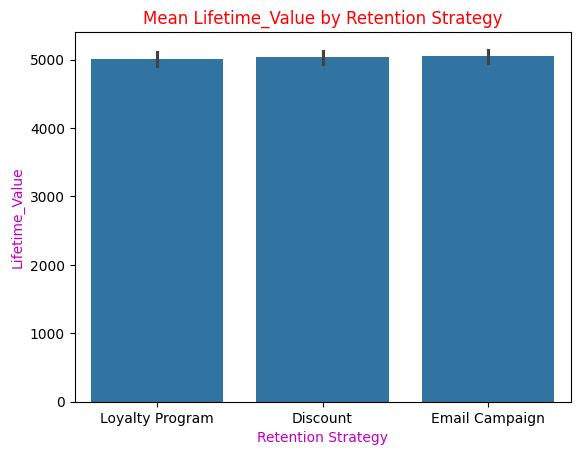

In [33]:
sns.barplot(x='Retention_Strategy', y='Lifetime_Value', data=data_cleaned)
plt.title('Mean Lifetime_Value by Retention Strategy', color = "r")
plt.xlabel('Retention Strategy', color = "m")
plt.ylabel('Lifetime_Value', color = "m")
plt.show()

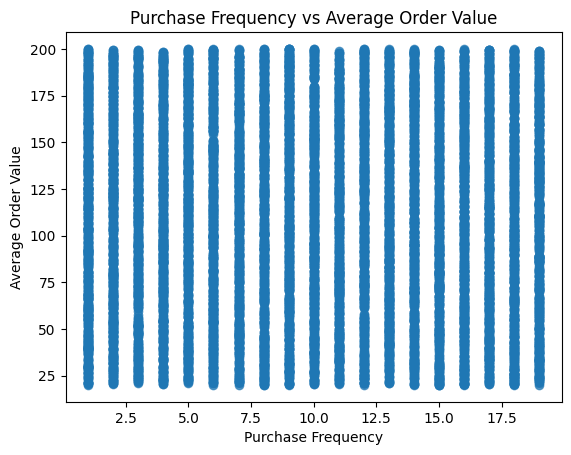

In [34]:
# Scatter plot: Purchase Frequency vs Average Order Value

plt.scatter(data_cleaned['Purchase_Frequency'], data_cleaned['Average_Order_Value'], alpha=0.7)
plt.title('Purchase Frequency vs Average Order Value')
plt.xlabel('Purchase Frequency')
plt.ylabel('Average Order Value')
plt.show()


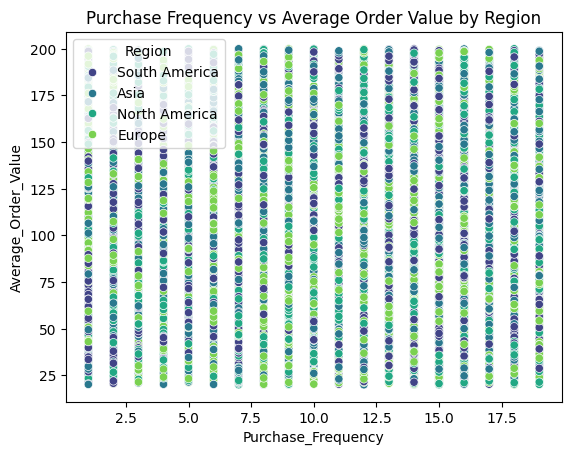

In [35]:
# Scatter plot with hue
sns.scatterplot(data=data_cleaned, x='Purchase_Frequency', y='Average_Order_Value', hue='Region', palette='viridis')
plt.title('Purchase Frequency vs Average Order Value by Region')
plt.show()

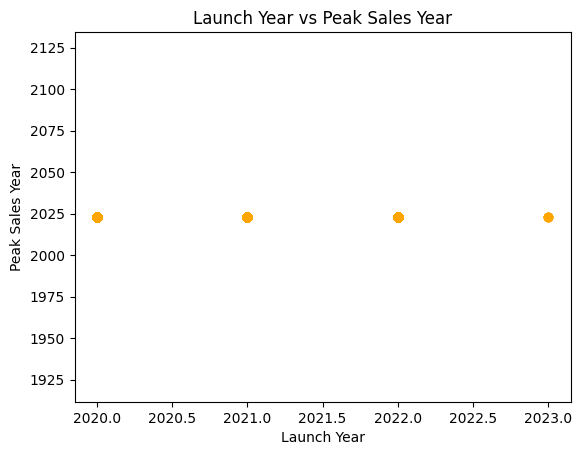

In [36]:
# Scatter plot: Launch Year vs Peak Sales Year
plt.scatter(data_cleaned['Launch_year'], data_cleaned['Peak_Sales_year'], alpha=0.7, color='orange')
plt.title('Launch Year vs Peak Sales Year')
plt.xlabel('Launch Year')
plt.ylabel('Peak Sales Year')
plt.show()


In [37]:
cat_col = data_cleaned.select_dtypes(include=['O'])


In [38]:
cat_col

,Most_Frequent_Category,Region,Season,Preferred_Purchase_Times,Retention_Strategy
0,Electronics,South America,Winter,Afternoon,Loyalty Program
1,Clothing,South America,Spring,Afternoon,Discount
2,Sports,Asia,Winter,Evening,Loyalty Program
3,Clothing,North America,Spring,Evening,Discount
4,Electronics,North America,Spring,Morning,Discount
...,...,...,...,...,...
9995,Clothing,Europe,Winter,Evening,Loyalty Program
9996,Clothing,Europe,Spring,Morning,Loyalty Program
9997,Home,Asia,Spring,Evening,Discount
9998,Electronics,North America,Summer,Morning,Discount


In [39]:
num_col = data_cleaned.select_dtypes(include=['float64', 'int64'])


In [40]:
num_col

,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
0,17,172.57,45,0.98,952.81
1,10,64.89,6,0.66,5427.51
2,3,120.38,23,0.60,3994.80
3,12,70.34,5,0.78,4880.01
4,18,42.39,10,0.52,8557.70
...,...,...,...,...,...
9995,15,162.51,72,0.84,1154.61
9996,18,63.02,68,0.03,593.22
9997,15,116.80,72,0.61,4676.35
9998,12,144.21,38,0.05,6850.85


In [41]:
correlation_matrix = num_col.corr()


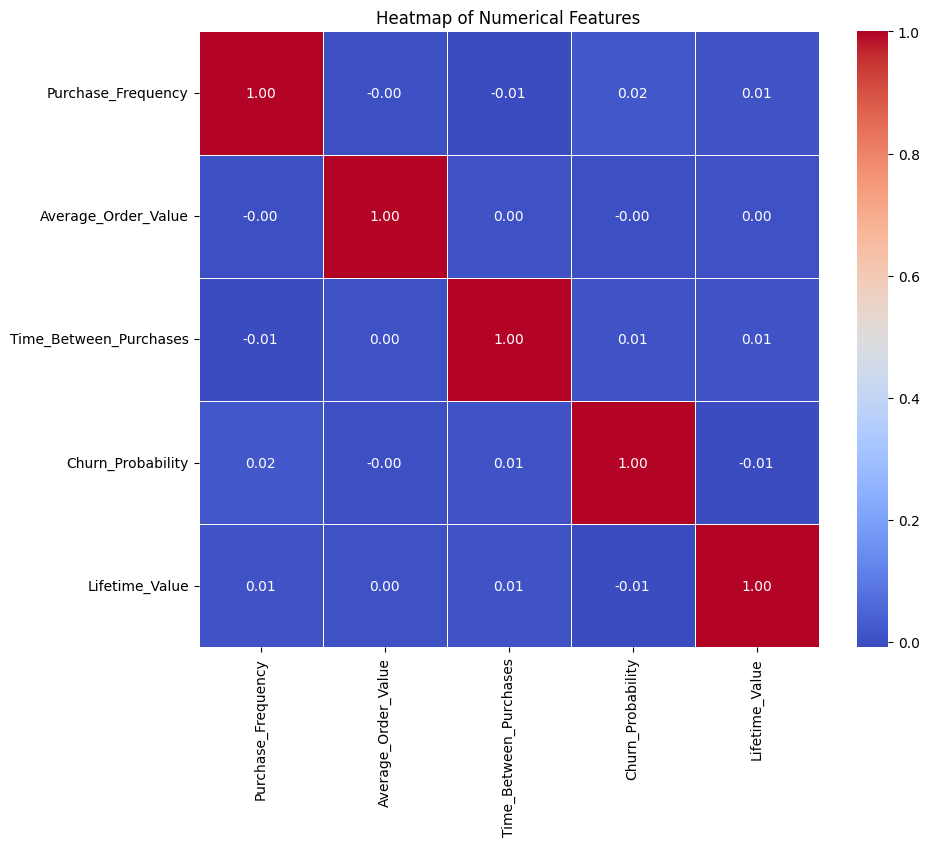

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Numerical Features')
plt.show()

In [52]:
data_cleaned.head()

,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Season,Preferred_Purchase_Times,Retention_Strategy,Launch_year,Peak_Sales_year,Launch_month,Peak_Sales_month,Launch_day,Peak_Sales_day
0,17,172.57,Electronics,45,South America,0.98,952.81,Winter,Afternoon,Loyalty Program,2020,2023,3,9,14,11
1,10,64.89,Clothing,6,South America,0.66,5427.51,Spring,Afternoon,Discount,2022,2023,10,1,15,2
2,3,120.38,Sports,23,Asia,0.60,3994.80,Winter,Evening,Loyalty Program,2021,2023,11,4,30,6
3,12,70.34,Clothing,5,North America,0.78,4880.01,Spring,Evening,Discount,2022,2023,3,3,20,23
4,18,42.39,Electronics,10,North America,0.52,8557.70,Spring,Morning,Discount,2022,2023,11,10,9,28


In [67]:
X = data_cleaned.drop('Churn_Probability' , axis = 1)

In [70]:
y = data_cleaned['Churn_Probability']

In [71]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 9)

In [72]:
transformer1 = ColumnTransformer(transformers = [ 
    ('trf1' , OneHotEncoder() ,  ['Most_Frequent_Category','Region','Retention_Strategy'] )  ,
    ('trf2' , OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['Preferred_Purchase_Times' , 'Season'])  
],remainder = "passthrough")

In [73]:
transformer2 = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), num_col)
    ],
    remainder="passthrough"
)


In [74]:
transformer3 =  SelectKBest(score_func=chi2,k=7)

In [75]:
final_pipeline = make_pipeline(transformer1 , transformer2 , transformer3)

In [76]:
final_pipeline

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1', OneHotEncoder(),
                                                  ['Most_Frequent_Category',
                                                   'Region',
                                                   'Retention_Strategy']),
                                                 ('trf2',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Preferred_Purchase_Times',
                                                   'Season'])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='pas...
...                  ...                  ...                     ...   
9995                  15               162.51                      72   
9996                  18                63.02                      68   
9997                  15               116.80                      72   
9998                  12               144.21                      38   
9999                   3                91.32                       6   

      Churn_Probability  Lifetime_Value  
0                  0.98          952.81  
1                  0.66         5427.51  
2                  0.60         3994.80  
3                  0.78         4880.01  
4                  0.52         8557.70  
...                 ...             ...  
9995               0.84         1154.61  
9996               0.03          593.22  
9997               0.61         4676.35  
9998               0.05         6850.85  
9999               0.67         1549.00  

[10000 rows x 5 columns])])),
                ('selectkbest',
                 SelectKBest(k=7,
                             score_func=<function chi2 at 0x000002AF7FEEC9A0>))])

In [77]:
final_pipeline.fit(X_train,y_train)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed